# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\vineet\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [6]:
# #Sampling down the data
project_data = project_data.sample(frac=0.5)

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
66102       25845  p157580  7e0819d818048c616cebcc309a4d328e            Ms.   
8117       122940  p074337  e94777bc5ccdb63bc87637da51394db7        Teacher   

      school_state project_submitted_datetime project_grade_category  \
66102           AL        2017-04-06 19:49:20             Grades 3-5   
8117            UT        2017-04-21 00:34:34          Grades PreK-2   

                                     project_title  \
66102                 Bouncy Bands for Brain Gains   
8117   Kindergarten Fun Books - Student Portfolios   

                                         project_essay_1  \
66102  Our class is filled with students from differi...   
8117   My Kindergarten students are eager to learn an...   

                                         project_essay_2 project_essay_3  \
66102  Bouncy Bands attach to student desks or chairs...             NaN   
8117   This project would provide materials for stude...             NaN   

      project_essay_4                           project_resource_summary  \
66102             NaN  My students need a non-disruptive outlet for t...   
8117              NaN  My students need a class set (25) of 3\" binde...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
66102                                             0                    1   
8117                                              0                    0   

       price  quantity              clean_categories  \
66102  15.61        20    Health_Sports SpecialNeeds   
8117   84.36        56  Literacy_Language Music_Arts   

                 clean_subcategories  \
66102   Health_Wellness SpecialNeeds   
8117   Literature_Writing VisualArts   

                                                   essay  
66102  Our class is filled with students from differi...  
8117   My Kindergarten students are eager to learn an...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
# print(project_data['essay'].values[99999])
# print("="*50)

Our class is filled with students from differing backgrounds, multiple learning styles, a mixture of personalities, and most importantly a love for learning! \r\n\r\n\"Though they be but little, they are fierce!\" \r\n\r\n\r\nMy group of firecrackers love to read, solve math facts, task cards, help their teacher, work collaboratively in group projects, and spread kindness like it's their job! They love to build, create, dance, and act! Many students have a ton of energy that need to be refocused in other ways. \r\nBouncy Bands attach to student desks or chairs so kids can stretch their legs and bounce their feet while they work quietly at their seat!\r\n\r\nMy students have so much energy and sometimes they disrupt their classmates when they don't even mean to. During tests or tasks, these bouncy bands could calm my students with test anxiety. Research has shown that students retain more information when their blood is pumping and simple and quiet movements will be such an added benefi

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

I would describe my school as a close knit community. Our students are very hardworking and driven learners.   \r\nThe majority of our students come from low income homes.  This can mean that some of them do not have the same opportunities that others might.  \r\nThe students in my class are all so motivated to do so much, but sometimes they do not have the means to do so.  I am amazed at how creative they can be and what they can do. \r\nMy students love using technology to learn!   They enjoy researching the things that they learn about. Having more computers in the classroom would give them more opportunities for this.  \r\nI try to give them exposure to the use of technology daily. This becomes difficult with the limited amount of technology in my classroom. We use programs like Zearn.org and Accelerated Reader to practice math skills and reading.  We are able to watch videos, read articles and create things that we would not be able to do without computers. I can only imagine the 

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I would describe my school as a close knit community. Our students are very hardworking and driven learners.     The majority of our students come from low income homes.  This can mean that some of them do not have the same opportunities that others might.    The students in my class are all so motivated to do so much, but sometimes they do not have the means to do so.  I am amazed at how creative they can be and what they can do.   My students love using technology to learn!   They enjoy researching the things that they learn about. Having more computers in the classroom would give them more opportunities for this.    I try to give them exposure to the use of technology daily. This becomes difficult with the limited amount of technology in my classroom. We use programs like Zearn.org and Accelerated Reader to practice math skills and reading.  We are able to watch videos, read articles and create things that we would not be able to do without computers. I can only imagine the wonderfu

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I would describe my school as a close knit community Our students are very hardworking and driven learners The majority of our students come from low income homes This can mean that some of them do not have the same opportunities that others might The students in my class are all so motivated to do so much but sometimes they do not have the means to do so I am amazed at how creative they can be and what they can do My students love using technology to learn They enjoy researching the things that they learn about Having more computers in the classroom would give them more opportunities for this I try to give them exposure to the use of technology daily This becomes difficult with the limited amount of technology in my classroom We use programs like Zearn org and Accelerated Reader to practice math skills and reading We are able to watch videos read articles and create things that we would not be able to do without computers I can only imagine the wonderful things my students could do wi

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████| 54624/54624 [00:44<00:00, 1240.35it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'i would describe school close knit community our students hardworking driven learners the majority students come low income homes this mean not opportunities others might the students class motivated much sometimes not means i amazed creative my students love using technology learn they enjoy researching things learn having computers classroom would give opportunities i try give exposure use technology daily this becomes difficult limited amount technology classroom we use programs like zearn org accelerated reader practice math skills reading we able watch videos read articles create things would not able without computers i imagine wonderful things students could technology fingertips nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
    
preprocessed_titles[1]

100%|█████████████████████████████████| 54624/54624 [00:02<00:00, 22725.99it/s]


'kindergarten fun books student portfolios'

In [21]:
preprocessed_essays[20000]

project_data['clean_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [22]:
project_data['clean_titles'] = preprocessed_titles

## 1.5 Preparing data for models

In [23]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essays', 'clean_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [24]:
# # we use count vectorizer to convert the values into one 
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
# categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
# print(vectorizer.get_feature_names())
# print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

In [25]:
# # we use count vectorizer to convert the values into one 
# vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
# sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
# print(vectorizer.get_feature_names())
# print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

In [26]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [27]:
# # We are considering only the words which appeared in at least 10 documents(rows or projects).
# vectorizer = CountVectorizer(min_df=10)
# text_bow = vectorizer.fit_transform(preprocessed_essays)
# print("Shape of matrix after one hot encodig ",text_bow.shape)

In [28]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [29]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=10)
# text_tfidf = vectorizer.fit_transform(preprocessed_essays)
# print("Shape of matrix after one hot encodig ",text_tfidf.shape)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [30]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [31]:
# # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# # make sure you have the glove_vectors file
# with open('glove_vectors', 'rb') as f:
#     model = pickle.load(f)
#     glove_words =  set(model.keys())

In [32]:
# # average Word2Vec
# # compute average word2vec for each review.
# avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm(preprocessed_essays): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     cnt_words =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if word in glove_words:
#             vector += model[word]
#             cnt_words += 1
#     if cnt_words != 0:
#         vector /= cnt_words
#     avg_w2v_vectors.append(vector)

# print(len(avg_w2v_vectors))
# print(len(avg_w2v_vectors[0]))

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [33]:
# # S = ["abc def pqr", "def def def abc", "pqr pqr def"]
# tfidf_model = TfidfVectorizer()
# tfidf_model.fit(preprocessed_essays)
# # we are converting a dictionary with word as a key, and the idf as a value
# dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
# tfidf_words = set(tfidf_model.get_feature_names())

In [34]:
# # average Word2Vec
# # compute average word2vec for each review.
# tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm(preprocessed_essays): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     tf_idf_weight =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if (word in glove_words) and (word in tfidf_words):
#             vec = model[word] # getting the vector for each word
#             # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
#             tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
#             vector += (vec * tf_idf) # calculating tfidf weighted w2v
#             tf_idf_weight += tf_idf
#     if tf_idf_weight != 0:
#         vector /= tf_idf_weight
#     tfidf_w2v_vectors.append(vector)

# print(len(tfidf_w2v_vectors))
# print(len(tfidf_w2v_vectors[0]))

In [35]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [36]:
# price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
# project_data = pd.merge(project_data, price_data, on='id', how='left')

In [37]:
# # check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# # standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# from sklearn.preprocessing import StandardScaler

# # price_standardized = standardScalar.fit(project_data['price'].values)
# # this will rise the error
# # ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# # Reshape your data either using array.reshape(-1, 1)

# price_scalar = StandardScaler()
# price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# # Now standardize the data with above maen and variance.
# price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [38]:
# price_standardized

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [39]:
# print(categories_one_hot.shape)
# print(sub_categories_one_hot.shape)
# print(text_bow.shape)
# print(price_standardized.shape)

In [40]:
# # merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# from scipy.sparse import hstack
# # with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
# X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
# X.shape

In [41]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [42]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [43]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
sentiment_titles=[]

for sentance in tqdm(project_data['essay'].values):
    ss = sid.polarity_scores(sentance)
    sentiment_titles.append(ss)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vineet\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|███████████████████████████████████| 54624/54624 [03:50<00:00, 237.25it/s]


In [44]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essays', 'clean_titles'],
      dtype='object')

In [45]:
sentiment_neg=[]
sentiment_neu=[]
sentiment_pos=[]
sentiment_compound=[]

for i in sentiment_titles:
    for j,k in i.items():
        if(j=='neg'):
            sentiment_neg.append(k)
        else:
            if(j=='neu'):
                sentiment_neu.append(k)
            else:
                if(j=='pos'):
                    sentiment_pos.append(k)   
                else:
                    if(j=='compound'):
                        sentiment_compound.append(k)

In [46]:
project_data['sentiment_neg'] = sentiment_neg
project_data['sentiment_neu'] = sentiment_neu
project_data['sentiment_pos'] = sentiment_pos
project_data['sentiment_compound'] = sentiment_compound

In [47]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essays', 'clean_titles', 'sentiment_neg', 'sentiment_neu',
       'sentiment_pos', 'sentiment_compound'],
      dtype='object')

In [48]:
#https://stackoverflow.com/questions/49984905/count-number-of-words-per-row
project_data['words_title'] = project_data['project_title'].str.split().str.len()

In [49]:
#https://stackoverflow.com/questions/49984905/count-number-of-words-per-row
project_data['words_essay'] = project_data['essay'].str.split().str.len()

In [50]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
66102       25845  p157580  7e0819d818048c616cebcc309a4d328e            Ms.   
8117       122940  p074337  e94777bc5ccdb63bc87637da51394db7        Teacher   

      school_state project_submitted_datetime project_grade_category  \
66102           AL        2017-04-06 19:49:20             Grades 3-5   
8117            UT        2017-04-21 00:34:34          Grades PreK-2   

                                     project_title  \
66102                 Bouncy Bands for Brain Gains   
8117   Kindergarten Fun Books - Student Portfolios   

                                project_resource_summary  \
66102  My students need a non-disruptive outlet for t...   
8117   My students need a class set (25) of 3\" binde...   

       teacher_number_of_previously_posted_projects  ...  \
66102                                             0  ...   
8117                                              0  ...   

                 clean_subcategories  \
66102   Health_Wellness SpecialNeeds   
8117   Literature_Writing VisualArts   

                                                   essay  \
66102  Our class is filled with students from differi...   
8117   My Kindergarten students are eager to learn an...   

                                            clean_essays  \
66102  our class filled students differing background...   
8117   my kindergarten students eager learn try new t...   

                                    clean_titles sentiment_neg sentiment_neu  \
66102                   bouncy bands brain gains         0.009         0.731   
8117   kindergarten fun books student portfolios         0.012         0.738   

      sentiment_pos sentiment_compound  words_title  words_essay  
66102          0.26             0.9952            5          180  
8117           0.25             0.9957            6          219  

[2 rows x 24 columns]

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [51]:
#https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [52]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data

In [53]:
X["project_grade_category"]=X["project_grade_category"].str.replace(' ', '')

In [54]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [55]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(24520, 23) (24520,)
(12078, 23) (12078,)
(18026, 23) (18026,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [56]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_cv_clean_cat_ohe.shape, y_cv.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 9) (24520,)
(12078, 9) (12078,)
(18026, 9) (18026,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [57]:
#Encoding project_subject_subcategories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data


# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcat_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
print(X_cv_clean_subcat_ohe.shape, y_cv.shape)
print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 30) (24520,)
(12078, 30) (12078,)
(18026, 30) (18026,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [58]:
#one hot encoding for teacher_prefix
from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(str(word).split())


teacher_dict = dict(my_counter)
sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))
print(sorted_teacher_dict)

vectorizer = CountVectorizer(vocabulary=list((sorted_teacher_dict.keys())), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
#Encoding Teacher prefix
# vectorizer = CountVectorizer()
# vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

{'null': 1, 'Dr.': 8, 'Teacher': 1209, 'Mr.': 5288, 'Ms.': 19369, 'Mrs.': 28749}
After vectorizations
(24520, 6) (24520,)
(12078, 6) (12078,)
(18026, 6) (18026,)
['null', 'Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']


In [59]:
#Encoding school state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 51) (24520,)
(12078, 51) (12078,)
(18026, 51) (18026,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [60]:
from collections import Counter
my_counter = Counter()
for word in X_train['project_grade_category'].values:
    my_counter.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))
# print(sorted_grade_dict.keys())

In [61]:
#one hot encoding the catogorical features: project_grade_category
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(24520, 4) (24520,)
(12078, 4) (12078,)
(18026, 4) (18026,)
['Grades9-12', 'Grades6-8', 'Grades3-5', 'GradesPreK-2']


In [62]:
#Normalising the numerical feature
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['price'].values.reshape(-1,1))

X_train_price_std = standard_vec.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_std = standard_vec.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_std = standard_vec.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)
print(X_cv_price_std.shape, y_cv.shape)
print(X_test_price_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [63]:
#Normalising the numerical feature-no of words in essay
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['words_essay'].values.reshape(-1,1))

X_train_words_essay_std = standard_vec.transform(X_train['words_essay'].values.reshape(-1,1))
X_cv_words_essay_std = standard_vec.transform(X_cv['words_essay'].values.reshape(-1,1))
X_test_words_essay_std = standard_vec.transform(X_test['words_essay'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_words_essay_std.shape, y_train.shape)
print(X_cv_words_essay_std.shape, y_cv.shape)
print(X_test_words_essay_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [64]:
#Normalising the numerical feature-sentiment score of neg words
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['sentiment_neg'].values.reshape(-1,1))

X_train_sentiment_neg_std = standard_vec.transform(X_train['sentiment_neg'].values.reshape(-1,1))
X_cv_sentiment_neg_std = standard_vec.transform(X_cv['sentiment_neg'].values.reshape(-1,1))
X_test_sentiment_neg_std = standard_vec.transform(X_test['sentiment_neg'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_sentiment_neg_std.shape, y_train.shape)
print(X_cv_sentiment_neg_std.shape, y_cv.shape)
print(X_test_sentiment_neg_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [65]:
#Normalising the numerical feature-sentiment score of neutral words
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['sentiment_neu'].values.reshape(-1,1))

X_train_sentiment_neu_std = standard_vec.transform(X_train['sentiment_neu'].values.reshape(-1,1))
X_cv_sentiment_neu_std = standard_vec.transform(X_cv['sentiment_neu'].values.reshape(-1,1))
X_test_sentiment_neu_std = standard_vec.transform(X_test['sentiment_neu'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_sentiment_neu_std.shape, y_train.shape)
print(X_cv_sentiment_neu_std.shape, y_cv.shape)
print(X_test_sentiment_neu_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [66]:
#Normalising the numerical feature-sentiment score of positive words
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['sentiment_pos'].values.reshape(-1,1))

X_train_sentiment_pos_std = standard_vec.transform(X_train['sentiment_pos'].values.reshape(-1,1))
X_cv_sentiment_pos_std = standard_vec.transform(X_cv['sentiment_pos'].values.reshape(-1,1))
X_test_sentiment_pos_std = standard_vec.transform(X_test['sentiment_pos'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_sentiment_pos_std.shape, y_train.shape)
print(X_cv_sentiment_pos_std.shape, y_cv.shape)
print(X_test_sentiment_pos_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [67]:
#Normalising the numerical feature-sentiment score of compound words
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['sentiment_compound'].values.reshape(-1,1))

X_train_sentiment_compound_std = standard_vec.transform(X_train['sentiment_compound'].values.reshape(-1,1))
X_cv_sentiment_compound_std = standard_vec.transform(X_cv['sentiment_compound'].values.reshape(-1,1))
X_test_sentiment_compound_std = standard_vec.transform(X_test['sentiment_compound'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_sentiment_compound_std.shape, y_train.shape)
print(X_cv_sentiment_compound_std.shape, y_cv.shape)
print(X_test_sentiment_compound_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [68]:
import warnings
warnings.filterwarnings("ignore")
#Normalising the numerical features: teacher_number_of_previously _posted_projects
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_projects_std = standard_vec.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_projects_std = standard_vec.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_projects_std = standard_vec.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_projects_std.shape, y_train.shape)
print(X_cv_projects_std.shape, y_cv.shape)
print(X_test_projects_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


In [69]:
#Normalising numerical features: "quantity
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['quantity'].values.reshape(-1,1))

X_train_qty_std = standard_vec.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_qty_std = standard_vec.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_qty_std = standard_vec.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_qty_std.shape, y_train.shape)
print(X_cv_qty_std.shape, y_cv.shape)
print(X_test_qty_std.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1) (24520,)
(12078, 1) (12078,)
(18026, 1) (18026,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [70]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['clean_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 54787) (24520,)
(12078, 54787) (12078,)
(18026, 54787) (18026,)


In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectorizer.transform(X_train['clean_titles'].values)
X_cv_titles_bow = vectorizer.transform(X_cv['clean_titles'].values)
X_test_titles_bow = vectorizer.transform(X_test['clean_titles'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 1769) (24520,)
(12078, 1769) (12078,)
(18026, 1769) (18026,)


In [72]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_summary_bow = vectorizer.transform(X_train['project_resource_summary'].values)
X_cv_summary_bow = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_summary_bow = vectorizer.transform(X_test['project_resource_summary'].values)

print("After vectorizations")
print(X_train_summary_bow.shape, y_train.shape)
print(X_cv_summary_bow.shape, y_cv.shape)
print(X_test_summary_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(24520, 8248) (24520,)
(12078, 8248) (12078,)
(18026, 8248) (18026,)


In [73]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_titles_bow,X_train_summary_bow,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((X_cv_essay_bow,X_cv_titles_bow,X_cv_summary_bow,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_titles_bow,X_test_summary_bow,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 64907) (24520,)
(12078, 64907) (12078,)
(18026, 64907) (18026,)


## 2.4Appling Decision Tree on different kind of featurization as mentioned in the instructions

### 2.4.1 Apply Decision tree on BOW, Set1

In [74]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

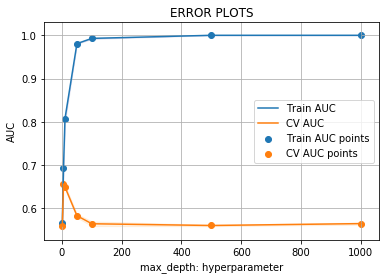

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 7min 14s


In [76]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=5,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

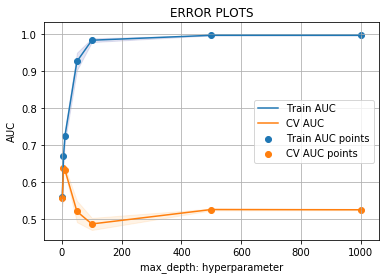

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [76]:
# print(clf.best_estimator_)
#Now trying for different values of min_sample_split
#min_samples_split=10
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=10,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

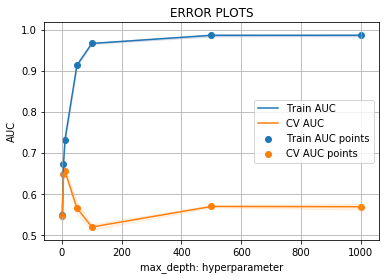

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [90]:
# print(clf.best_estimator_)
#Now trying for different values of min_sample_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=100,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

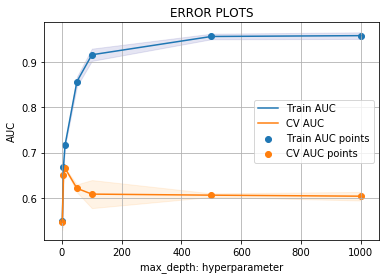

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [91]:
# print(clf.best_estimator_)
#Now trying for different values of min_sample_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=500,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

In [78]:
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000],'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


### Best min_sample split and max_depth are (10,500) from the graph results

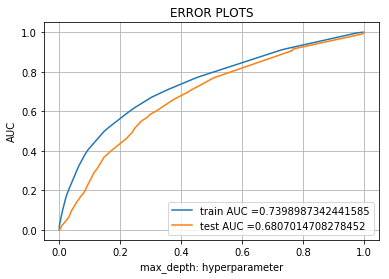

Wall time: 5.56 s


In [75]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn import tree

dtc=tree.DecisionTreeClassifier(min_samples_split=500,max_depth=10,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
dtc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtc, X_tr)    
y_test_pred = batch_predict(dtc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [149]:
# print(type(y_train_pred))

In [78]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [81]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn import tree
dtc=tree.DecisionTreeClassifier(min_samples_split=500,max_depth=10,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
dtc.fit(X_tr, y_train)
y_train_pred = batch_predict(dtc, X_tr)    
y_test_pred = batch_predict(dtc, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)
a=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
# print(type(a))
# print(a[0][1])
fp=a[0][1]
print(fp)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24832535548504936 for threshold 0.362
[[ 2029  1722]
 [ 4656 16113]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387
[[ 1382  1375]
 [ 3613 11656]]
the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387
1375


the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387


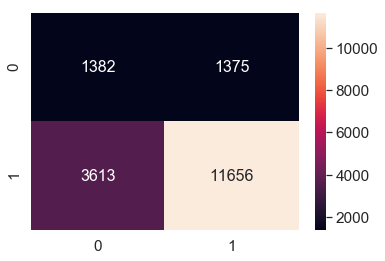

In [82]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [84]:
# %%time
# # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
# from sklearn.metrics import roc_curve, auc
# from sklearn.linear_model import LogisticRegression
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn import tree

# dtc=tree.DecisionTreeClassifier(min_samples_split=500,max_depth=10,class_weight="balanced")
# #https://github.com/scikit-learn/scikit-learn/issues/7278
# # calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
# dtc.fit(X_tr, y_train)
# # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# # not the predicted outputs

# y_train_pred = batch_predict(dtc, X_tr)    
# y_test_pred = batch_predict(dtc, X_te)

# train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
# test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
# # print(y_test_pred)
predictions=[]
t = tr_thresholds[np.argmax(test_fpr*(1-test_fpr))]
for i in y_test_pred:
    if i>=t:
        predictions.append(1)
    else:
        predictions.append(0)
print(len(predictions))

18026


In [85]:
# print(test_fpr)

In [86]:
fpr_list=[]
for i in range(0,len(y_test_pred)):
    if(y_test[i]==0 and predictions[i]==1):
        fpr_list.append(i)
# print(fpr_list)

In [87]:
a=X_test['clean_essays'].values
print(type(a))
print(len(a))

<class 'numpy.ndarray'>
18026


In [88]:
# print(te_thresholds)
worcloud_essay=[]
for i in range(0,len(a)):
    for j in fpr_list:
        if(i==j):
            worcloud_essay.append(a[i])
print(len(worcloud_essay))
# print(worcloud_essay[1])

1375


In [89]:
a=str(worcloud_essay)
t_b=a.replace('nannan','')

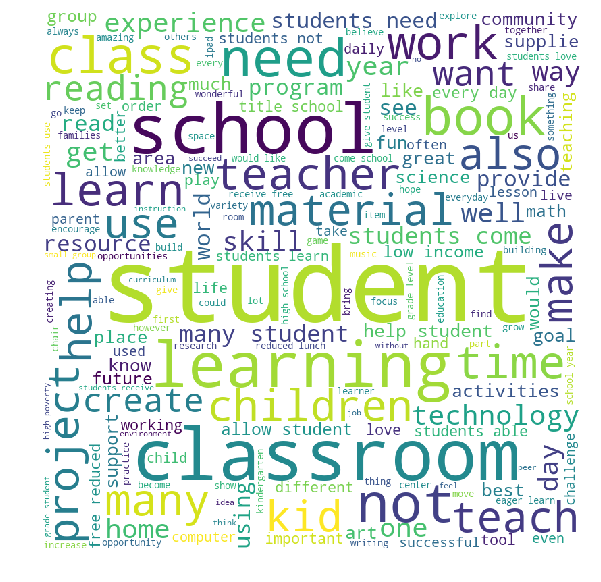

In [90]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(t_b)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [91]:
b=X_test['price'].values

In [92]:
# print(te_thresholds)
price_fpr=[]
for i in range(0,len(b)):
    for j in fpr_list:
        if(i==j):
            price_fpr.append(b[i])
# print(len(worcloud_essay))
print(price_fpr[1])
print(len(price_fpr))

193.96
1375


In [93]:
y_status=[]
for i in range(0,len(y_test)):
    for j in fpr_list:
        if(i==j):
            y_status.append(y_test[i])
# print(len(worcloud_essay))
# print(y_status)
print(len(y_status))

1375


In [94]:
df3 = pd.DataFrame( {'price': price_fpr,'status': y_status})
print(df3.head(1))

    price  status
0  386.95       0


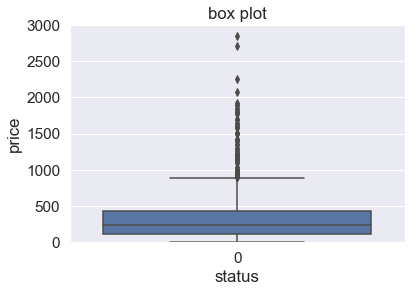

In [95]:
#https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib
# plt.close()
plt.title("box plot")
axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0,3000])
# axes.title("Box plot")
# axes.figure(figsize=(20,10))
sns.boxplot(x='status',y='price', data=df3)
# axes.show()

In [96]:
t=X_test['teacher_number_of_previously_posted_projects'].values

In [97]:
# print(te_thresholds)
teacher_fpr=[]
for i in range(0,len(t)):
    for j in fpr_list:
        if(i==j):
            teacher_fpr.append(t[i])
# print(len(worcloud_essay))
print(teacher_fpr[1])
print(len(teacher_fpr))

18
1375


[8.38545455e-01 9.89090909e-02 2.83636364e-02 1.30909091e-02
 4.36363636e-03 5.81818182e-03 5.09090909e-03 2.90909091e-03
 7.27272727e-04 2.18181818e-03]
[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180. 200.]


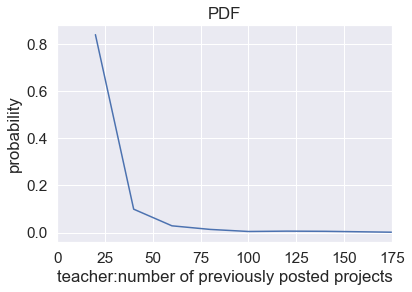

In [98]:
counts, bin_edges = np.histogram(teacher_fpr, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_xlim([0,175])
cdf = np.cumsum(pdf)
plt.xlabel("teacher:number of previously posted projects")
plt.title("PDF")
plt.ylabel("probability")
plt.plot(bin_edges[1:],pdf);

### 2.4.1.1Visulaizing Decision Tree

In [99]:
# for x in X_train:
#     print()

In [100]:
print(X_train.shape)
# X_train=X_train.applymap(str)
# X_test=X_test.applymap(str)
# print(df_graphviz.shape)
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() 
X_train_vec = count_vect.fit_transform(X_train['clean_essays'].values)
X_test_vec = count_vect.transform(X_test['clean_essays'].values)
# print(type(X_train_vec))
# print(X_train_vec.shape)


(24520, 23)


In [101]:
# print(X_train_vec[1])

In [102]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_vec_standardized = sc.fit_transform(X_train_vec)
X_test_vec_standardized = sc.transform(X_test_vec)

In [103]:
voc = count_vect.vocabulary_

ind=list(voc.values())
indexes = np.array(ind).argsort()

words=list(voc.keys())
sorted_words=[]
for i in indexes:
    sorted_words.append(words[i])

In [104]:
from sklearn import tree
from os import system


dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_vec_standardized,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

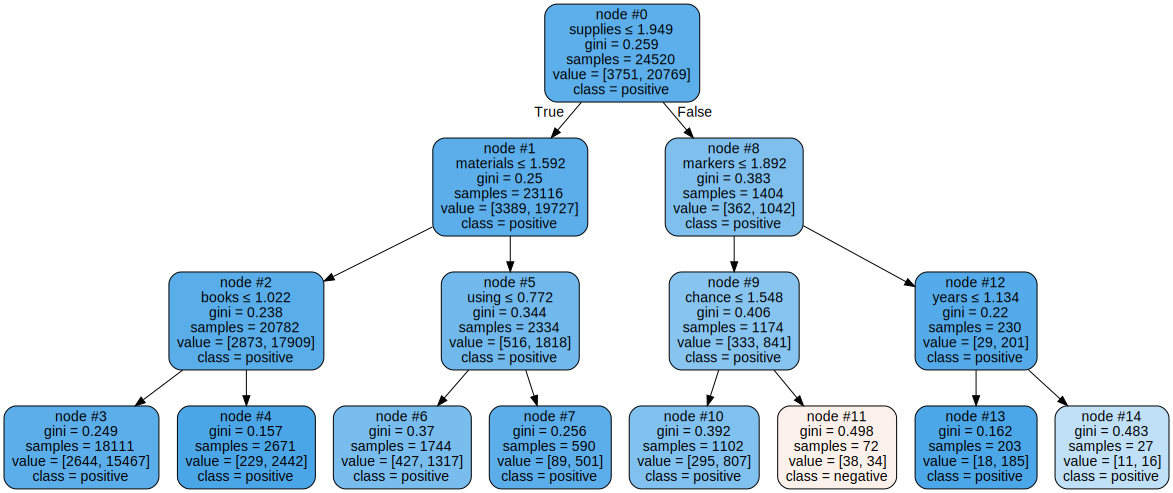

In [107]:
# https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft
# https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
target = ['negative','positive']
graph=Source(tree.export_graphviz(dt, out_file=None, class_names=target,filled=True,rounded=True,special_characters=True,node_ids=True,feature_names=sorted_words))
SVG(graph.pipe(format='svg'))


In [108]:
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

### 2.4.2 Apply Decision Tree on TFIDF ,Set 2

In [109]:
#Vectorizing Essays
# Please write all the code with proper documentation
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['clean_essays'].values)

print(X_train_essay_tfidf.shape)
print(X_train_essay_tfidf.shape)
print(X_train_essay_tfidf.shape)

(24520, 54787)
(24520, 54787)
(24520, 54787)


In [110]:
#Vectorizing Titles
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vectorizer.transform(X_train['clean_titles'].values)
X_cv_titles_tfidf = vectorizer.transform(X_cv['clean_titles'].values)
X_test_titles_tfidf = vectorizer.transform(X_test['clean_titles'].values)
print("Train shape:",X_train_titles_tfidf.shape)
print("CV shape:",X_cv_titles_tfidf.shape)
print("Test shape:",X_test_titles_tfidf.shape)

Train shape: (24520, 1769)
CV shape: (12078, 1769)
Test shape: (18026, 1769)


In [111]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((X_test_essay_tfidf,X_test_titles_tfidf,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 56659) (24520,)
(12078, 56659) (12078,)
(18026, 56659) (18026,)


In [112]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

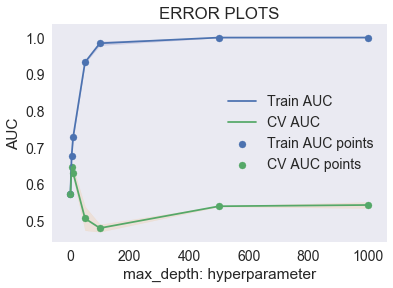

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 11min 41s


In [229]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=5,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

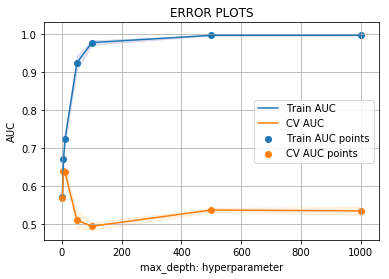

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 11min 20s


In [99]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=10,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

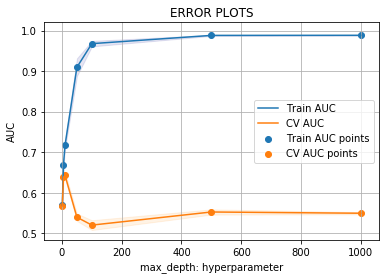

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 11min 1s


In [100]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=100,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

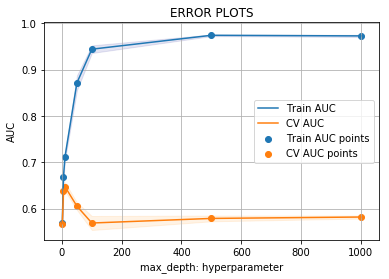

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 10min 39s


In [101]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=500,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

In [113]:
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000],'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


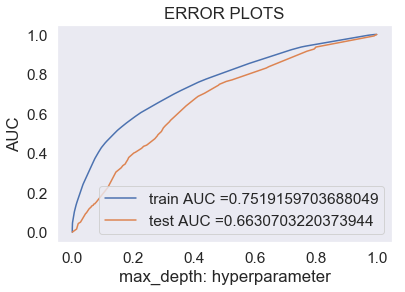

Wall time: 8.31 s


In [142]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn import tree

dtc=tree.DecisionTreeClassifier(min_samples_split=500,max_depth=10,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
dtc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtc, X_tr)    
y_test_pred = batch_predict(dtc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [115]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [116]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)
a=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
# print(type(a))
# print(a[0][1])
# fp=a[0][1]
# print(fp)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24832535548504936 for threshold 0.362
[[ 2029  1722]
 [ 4656 16113]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387
[[ 1382  1375]
 [ 3613 11656]]
the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387


the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387


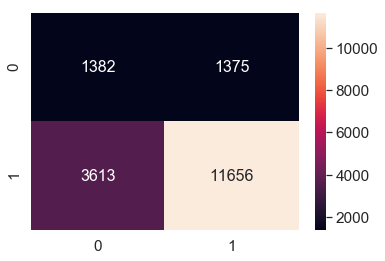

In [117]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [118]:
# print(y_test_pred)
predictions=[]
t = tr_thresholds[np.argmax(test_fpr*(1-test_fpr))]
for i in y_test_pred:
    if i>=t:
        predictions.append(1)
    else:
        predictions.append(0)
print(len(predictions))

18026


In [119]:
fpr_list=[]
for i in range(0,len(y_test_pred)):
    if(y_test[i]==0 and predictions[i]==1):
        fpr_list.append(i)
print(fpr_list[0:10])
print(len(fpr_list))

[0, 7, 37, 49, 70, 71, 75, 87, 119, 120]
1375


In [120]:
a=X_test['clean_essays'].values
print(type(a))
print(len(a))

<class 'numpy.ndarray'>
18026


In [121]:
# print(te_thresholds)
worcloud_essay=[]
for i in range(0,len(a)):
    for j in fpr_list:
        if(i==j):
            worcloud_essay.append(a[i])
# print(len(worcloud_essay))
print(worcloud_essay[1])

students english language arts classes juniors seniors attend comprehensive high school rural county they incredible variety backgrounds experiences come together prepare futures diverse my students interacting complex texts daily in class study literature ranges ancient greek tragedies contemporary political rhetoric by feeding rich literature empower address problems world faces today my students able use kindle fire tablets closely read vast amount classic literature available public domain by donating set five chromebooks classroom empower students work together find answers questions arise literature they able study classic poetry drama essays novels work expand understanding world perspectives people they able research topics allow pursue understanding engage peers virtually share work digitally those collaboration communication skills valuable every student nannan


In [122]:
a=str(worcloud_essay)
t_b=a.replace('nannan','')

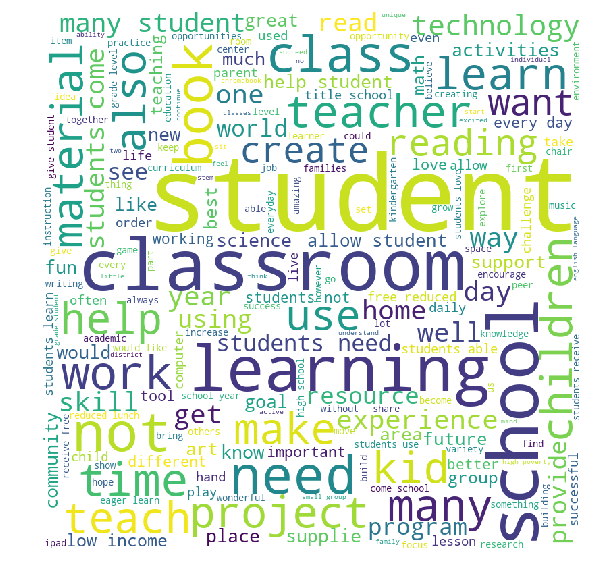

In [123]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(t_b)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [124]:
b=X_test['price'].values

In [125]:
# print(te_thresholds)
price_fpr=[]
for i in range(0,len(b)):
    for j in fpr_list:
        if(i==j):
            price_fpr.append(b[i])
# print(len(worcloud_essay))
# print(type(price_fpr[1]))
# print(len(price_fpr))

In [126]:
print(y_test[0:10])
y_status=[]
for i in range(0,len(y_test)):
    for j in fpr_list:
        if(i==j):
            y_status.append(y_test[i])
# print(len(worcloud_essay))
# print(y_status)
# print(len(y_status))
# print(y_status[0:10])

[0 1 0 1 0 0 1 0 1 1]


In [127]:
df3 = pd.DataFrame( {'price': price_fpr,'status': y_status})
print(df3.head(1))

    price  status
0  386.95       0


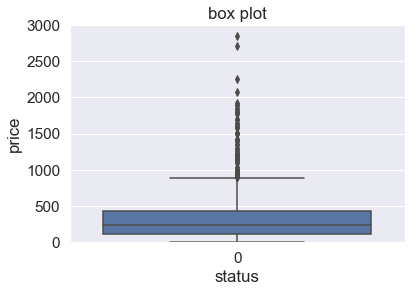

In [128]:
#https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib
# plt.close()
plt.title("box plot")
axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0,3000])
# axes.title("Box plot")
# axes.figure(figsize=(20,10))
sns.boxplot(x='status',y='price', data=df3)
# axes.show()

In [129]:
t=X_test['teacher_number_of_previously_posted_projects'].values

In [130]:
# print(te_thresholds)
teacher_fpr=[]
for i in range(0,len(t)):
    for j in fpr_list:
        if(i==j):
            teacher_fpr.append(t[i])
# print(len(worcloud_essay))
# print(teacher_fpr[1])
# print(len(teacher_fpr))

[8.38545455e-01 9.89090909e-02 2.83636364e-02 1.30909091e-02
 4.36363636e-03 5.81818182e-03 5.09090909e-03 2.90909091e-03
 7.27272727e-04 2.18181818e-03]
[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180. 200.]


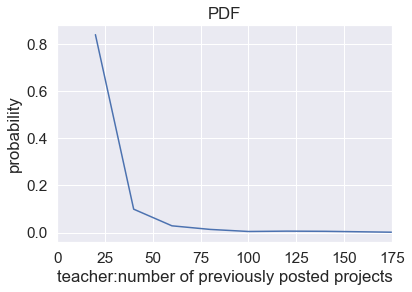

In [131]:
counts, bin_edges = np.histogram(teacher_fpr, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_xlim([0,175])
cdf = np.cumsum(pdf)
plt.xlabel("teacher:number of previously posted projects")
plt.title("PDF")
plt.ylabel("probability")
plt.plot(bin_edges[1:],pdf);

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
X_train_vec = tf_idf_vect.fit_transform(X_train['clean_essays'].values)
X_test_vec = tf_idf_vect.transform(X_test['clean_essays'].values)
# print(X_train_vec.shape)

In [133]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_vec_standardized = sc.fit_transform(X_train_vec)
X_test_vec_standardized = sc.transform(X_test_vec)

In [134]:
voc = count_vect.vocabulary_

ind=list(voc.values())
indexes = np.array(ind).argsort()

words=list(voc.keys())
sorted_words=[]
for i in indexes:
    sorted_words.append(words[i])

In [135]:
from sklearn import tree
from os import system


dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_vec_standardized,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

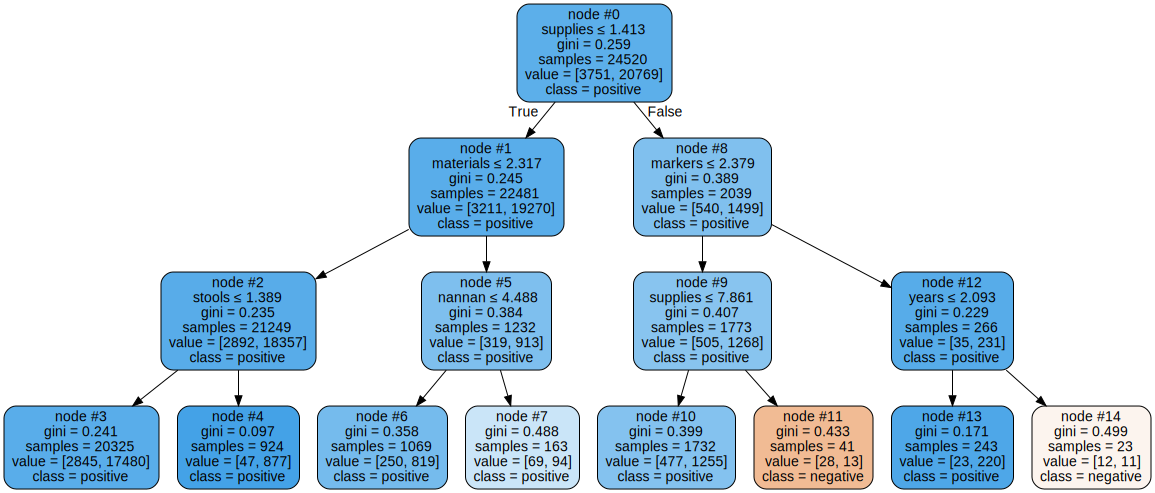

In [136]:
# https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft
# https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
target = ['negative','positive']
graph=Source(tree.export_graphviz(dt, out_file=None, class_names=target,filled=True,rounded=True,node_ids=True,special_characters=True,feature_names=sorted_words))
SVG(graph.pipe(format='svg'))

In [137]:
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

### 2.4.3Applying Decision Trees on AVG W2V, SET 3

In [138]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
# average Word2Vec
# compute average word2vec for each review.
train_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_essays.append(vector)
print("train  vector")
print(len(train_w2v_vectors_essays))
print(len(train_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
test_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_essays.append(vector)

print("Test vec")
print(len(test_w2v_vectors_essays))
print(len(test_w2v_vectors_essays[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each review.
cv_w2v_vectors_essays = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_essays.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_essays))
print(len(cv_w2v_vectors_essays[0]))
print('='*50)

100%|███████████████████████████████████| 24520/24520 [00:26<00:00, 927.26it/s]


train  vector
24520
300


100%|██████████████████████████████████| 18026/18026 [00:08<00:00, 2077.16it/s]


Test vec
18026
300


100%|██████████████████████████████████| 12078/12078 [00:06<00:00, 1871.06it/s]


CV vec
12078
300


In [143]:
# Changing list to numpy arrays
train_w2v_vectors_essays = np.array(train_w2v_vectors_essays)
test_w2v_vectors_essays = np.array(test_w2v_vectors_essays)
cv_w2v_vectors_essays = np.array(cv_w2v_vectors_essays)


In [144]:
# average Word2Vec
# compute average word2vec for each title.
train_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_train['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_w2v_vectors_titles.append(vector)
print("train  vector")
print(len(train_w2v_vectors_titles))
print(len(train_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each title.
test_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_w2v_vectors_titles.append(vector)

print("Test vec")
print(len(test_w2v_vectors_titles))
print(len(test_w2v_vectors_titles[0]))
print('='*50)

# average Word2Vec
# compute average word2vec for each title.
cv_w2v_vectors_titles = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each essay in training data
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_w2v_vectors_titles.append(vector)

print("CV vec")
print(len(cv_w2v_vectors_titles))
print(len(cv_w2v_vectors_titles[0]))
print('='*50)

100%|█████████████████████████████████| 24520/24520 [00:00<00:00, 38588.62it/s]


train  vector
24520
300


100%|█████████████████████████████████| 18026/18026 [00:00<00:00, 38903.29it/s]


Test vec
18026
300


100%|█████████████████████████████████| 12078/12078 [00:00<00:00, 39061.31it/s]


CV vec
12078
300


In [145]:
# Changing list to numpy arrays
train_w2v_vectors_titles = np.array(train_w2v_vectors_titles)
test_w2v_vectors_titles = np.array(test_w2v_vectors_titles)
cv_w2v_vectors_titles = np.array(cv_w2v_vectors_titles)

In [146]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((train_w2v_vectors_essays,train_w2v_vectors_titles,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((cv_w2v_vectors_essays,cv_w2v_vectors_titles,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((test_w2v_vectors_essays,test_w2v_vectors_titles,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 703) (24520,)
(12078, 703) (12078,)
(18026, 703) (18026,)


In [147]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

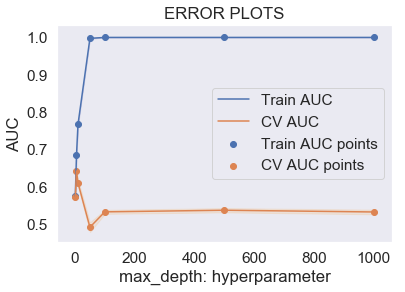

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 16min 13s


In [148]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=5,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

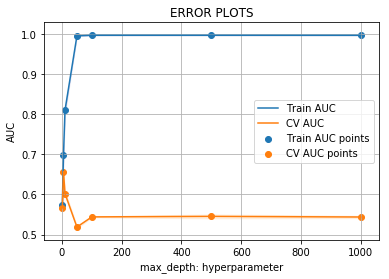

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 15min 4s


In [79]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=10,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

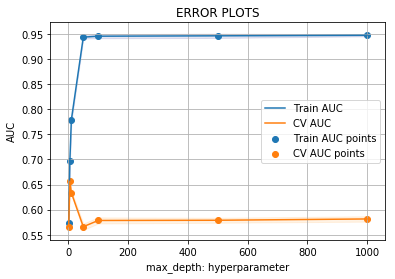

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 15min 13s


In [80]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=100,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

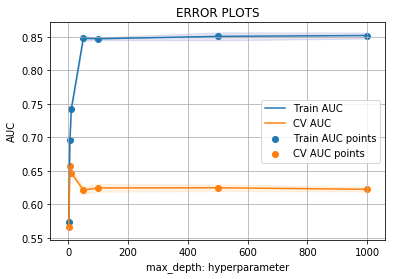

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 10min 55s


In [81]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=500,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

In [150]:
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000],'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


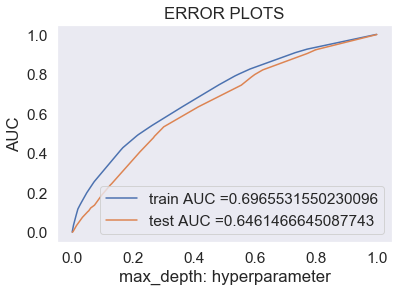

Wall time: 12.2 s


In [154]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn import tree

dtc=tree.DecisionTreeClassifier(min_samples_split=500,max_depth=5,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
dtc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtc, X_tr)    
y_test_pred = batch_predict(dtc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [155]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [156]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)
a=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
# print(type(a))
# print(a[0][1])
# fp=a[0][1]
# print(fp)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24832535548504936 for threshold 0.362
[[ 2029  1722]
 [ 4656 16113]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387
[[ 1382  1375]
 [ 3613 11656]]
the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387


the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387


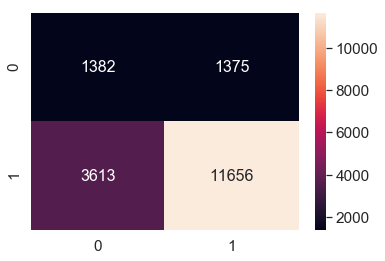

In [157]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [158]:
# print(y_test_pred)
predictions=[]
t = tr_thresholds[np.argmax(test_fpr*(1-test_fpr))]
for i in y_test_pred:
    if i>=t:
        predictions.append(1)
    else:
        predictions.append(0)
print(len(predictions))

18026


In [159]:
fpr_list=[]
for i in range(0,len(y_test_pred)):
    if(y_test[i]==0 and predictions[i]==1):
        fpr_list.append(i)
print(fpr_list[0:10])
print(len(fpr_list))

[0, 7, 37, 49, 70, 71, 75, 87, 119, 120]
1375


In [160]:
a=X_test['clean_essays'].values

In [161]:
# print(te_thresholds)
worcloud_essay=[]
for i in range(0,len(a)):
    for j in fpr_list:
        if(i==j):
            worcloud_essay.append(a[i])
# print(len(worcloud_essay))
print(worcloud_essay[1])

students english language arts classes juniors seniors attend comprehensive high school rural county they incredible variety backgrounds experiences come together prepare futures diverse my students interacting complex texts daily in class study literature ranges ancient greek tragedies contemporary political rhetoric by feeding rich literature empower address problems world faces today my students able use kindle fire tablets closely read vast amount classic literature available public domain by donating set five chromebooks classroom empower students work together find answers questions arise literature they able study classic poetry drama essays novels work expand understanding world perspectives people they able research topics allow pursue understanding engage peers virtually share work digitally those collaboration communication skills valuable every student nannan


In [162]:
t_b=str(worcloud_essay)

In [163]:
t_b_f=t_b.replace('nannan','')

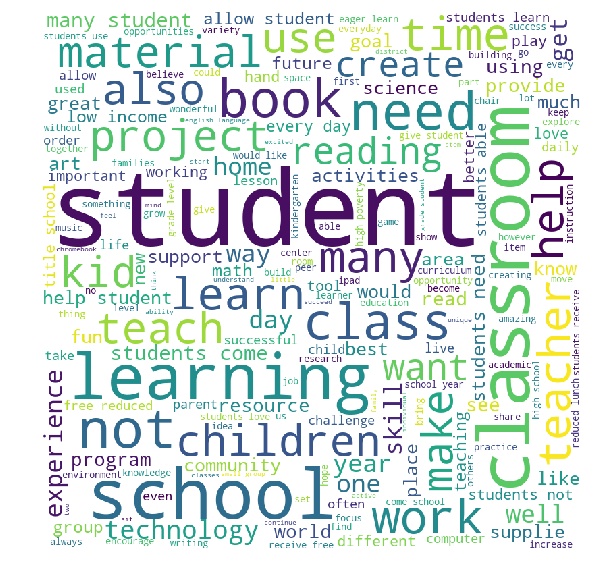

In [164]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(t_b_f)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [165]:
b=X_test['price'].values

In [166]:
# print(te_thresholds)
price_fpr=[]
for i in range(0,len(b)):
    for j in fpr_list:
        if(i==j):
            price_fpr.append(b[i])
# print(len(worcloud_essay))
# print(type(price_fpr[1]))
# print(len(price_fpr))

In [167]:
y_status=[]
for i in range(0,len(y_test)):
    for j in fpr_list:
        if(i==j):
            y_status.append(y_test[i])
# print(len(worcloud_essay))
# print(y_status)
print(len(y_status))

1375


In [168]:
df4 = pd.DataFrame( {'price': price_fpr,'status': y_status})
print(df4.head(1))

    price  status
0  386.95       0


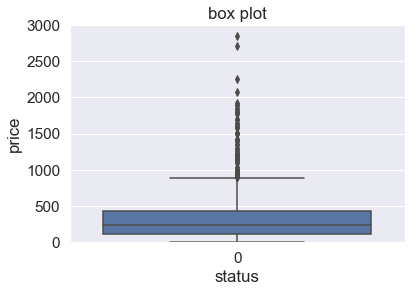

In [169]:
#https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib
# plt.close()
plt.title("box plot")
axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0,3000])
# axes.title("Box plot")
# axes.figure(figsize=(20,10))
sns.boxplot(x='status',y='price', data=df4)
# axes.show()

In [170]:
t=X_test['teacher_number_of_previously_posted_projects'].values

In [171]:
# print(te_thresholds)
teacher_fpr=[]
for i in range(0,len(t)):
    for j in fpr_list:
        if(i==j):
            teacher_fpr.append(t[i])
# print(len(worcloud_essay))
# print(teacher_fpr[1])
# print(len(teacher_fpr))

[8.38545455e-01 9.89090909e-02 2.83636364e-02 1.30909091e-02
 4.36363636e-03 5.81818182e-03 5.09090909e-03 2.90909091e-03
 7.27272727e-04 2.18181818e-03]
[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180. 200.]


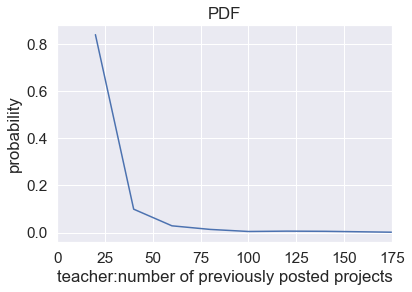

In [172]:
counts, bin_edges = np.histogram(teacher_fpr, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_xlim([0,175])
cdf = np.cumsum(pdf)
plt.xlabel("teacher:number of previously posted projects")
plt.title("PDF")
plt.ylabel("probability")
plt.plot(bin_edges[1:],pdf);

### 2.4.4 Applying Decision Trees on TFIDF W2V, SET 4

In [173]:
# Please write all the code with proper documentation
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)
    
print("Train matrix:")
print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))
print('='*50)

cv_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_essays.append(vector)
    
print("CV matrix:")
print(len(cv_tfidf_w2v_essays))
print(len(cv_tfidf_w2v_essays[0]))
print('='*50)

test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)
    
print("Test matrix:")
print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))
print('='*50)

100%|███████████████████████████████████| 24520/24520 [01:29<00:00, 273.45it/s]


Train matrix:
24520
300


100%|███████████████████████████████████| 12078/12078 [00:41<00:00, 289.71it/s]


CV matrix:
12078
300


100%|███████████████████████████████████| 18026/18026 [01:04<00:00, 278.26it/s]


Test matrix:
18026
300


In [174]:
# Changing list to numpy arrays
train_tfidf_w2v_essays = np.array(train_tfidf_w2v_essays)
test_tfidf_w2v_essays = np.array(test_tfidf_w2v_essays)
cv_tfidf_w2v_essays = np.array(cv_tfidf_w2v_essays)

In [175]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_titles'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)
    
print("Train matrix:")
print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))
print('='*50)

cv_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_titles.append(vector)
    
print("CV matrix:")
print(len(cv_tfidf_w2v_titles))
print(len(cv_tfidf_w2v_titles[0]))
print('='*50)

test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)
    
print("Test matrix:")
print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))
print('='*50)

100%|█████████████████████████████████| 24520/24520 [00:01<00:00, 19203.56it/s]


Train matrix:
24520
300


100%|█████████████████████████████████| 12078/12078 [00:00<00:00, 18483.93it/s]


CV matrix:
12078
300


100%|█████████████████████████████████| 18026/18026 [00:00<00:00, 18902.47it/s]


Test matrix:
18026
300


In [176]:
# Changing list to numpy arrays
train_tfidf_w2v_titles = np.array(train_tfidf_w2v_titles)
test_tfidf_w2v_titles = np.array(test_tfidf_w2v_titles)
cv_tfidf_w2v_titles = np.array(cv_tfidf_w2v_titles)

In [177]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((train_tfidf_w2v_essays,train_tfidf_w2v_titles,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr = hstack((cv_tfidf_w2v_essays,cv_tfidf_w2v_titles,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((test_tfidf_w2v_essays,test_tfidf_w2v_titles,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 703) (24520,)
(12078, 703) (12078,)
(18026, 703) (18026,)


In [178]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

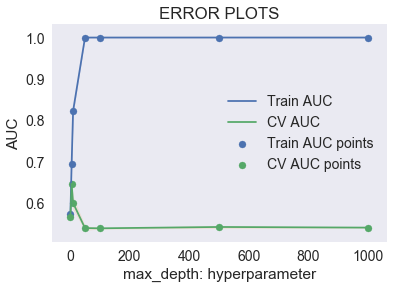

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 15min 20s


In [109]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=5)
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

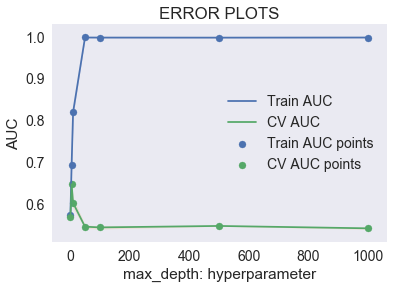

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 15min 13s


In [110]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=10)
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

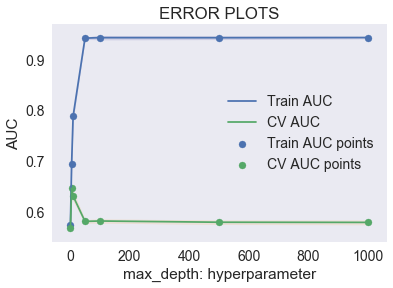

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 14min 14s


In [111]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=100)
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

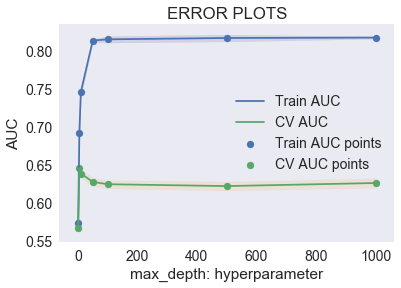

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 8min 47s


In [112]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=500)
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

In [180]:
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000],'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


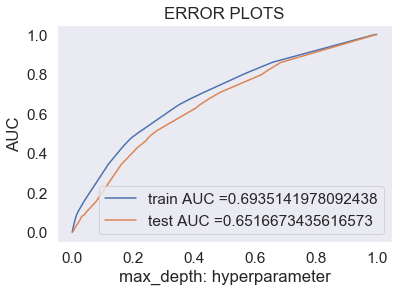

Wall time: 12.1 s


In [181]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn import tree

dtc=tree.DecisionTreeClassifier(min_samples_split=500,max_depth=5,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
dtc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtc, X_tr)    
y_test_pred = batch_predict(dtc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [182]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [183]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
print("="*100)
a=confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
# print(type(a))
# print(a[0][1])
# fp=a[0][1]
# print(fp)

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24832535548504936 for threshold 0.362
[[ 2029  1722]
 [ 4656 16113]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387
[[ 1382  1375]
 [ 3613 11656]]
the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387


the maximum value of tpr*(1-fpr) 0.24999838838034066 for threshold 0.387


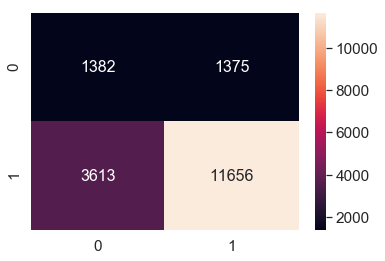

In [184]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
# import seaborn as sns; 
df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [185]:
# print(y_test_pred)
predictions=[]
t = tr_thresholds[np.argmax(test_fpr*(1-test_fpr))]
for i in y_test_pred:
    if i>=t:
        predictions.append(1)
    else:
        predictions.append(0)
print(len(predictions))

18026


In [186]:
fpr_list=[]
for i in range(0,len(y_test_pred)):
    if(y_test[i]==0 and predictions[i]==1):
        fpr_list.append(i)
print(fpr_list[0:10])
print(len(fpr_list))

[0, 7, 37, 49, 70, 71, 75, 87, 119, 120]
1375


In [187]:
a=X_test['clean_essays'].values

In [188]:
# print(te_thresholds)
worcloud_essay=[]
for i in range(0,len(a)):
    for j in fpr_list:
        if(i==j):
            worcloud_essay.append(a[i])
# print(len(worcloud_essay))
print(worcloud_essay[1])

students english language arts classes juniors seniors attend comprehensive high school rural county they incredible variety backgrounds experiences come together prepare futures diverse my students interacting complex texts daily in class study literature ranges ancient greek tragedies contemporary political rhetoric by feeding rich literature empower address problems world faces today my students able use kindle fire tablets closely read vast amount classic literature available public domain by donating set five chromebooks classroom empower students work together find answers questions arise literature they able study classic poetry drama essays novels work expand understanding world perspectives people they able research topics allow pursue understanding engage peers virtually share work digitally those collaboration communication skills valuable every student nannan


In [189]:
a=str(worcloud_essay)
t_b=a.replace('nannan','')

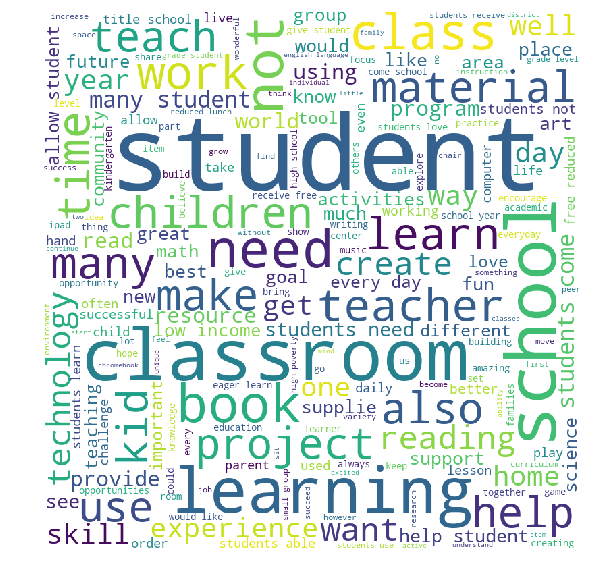

In [190]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(t_b)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [191]:
b=X_test['price'].values

In [192]:
# print(te_thresholds)
price_fpr=[]
for i in range(0,len(b)):
    for j in fpr_list:
        if(i==j):
            price_fpr.append(b[i])
# print(len(worcloud_essay))
# print(type(price_fpr[1]))
# print(len(price_fpr))

In [193]:
y_status=[]
for i in range(0,len(y_test)):
    for j in fpr_list:
        if(i==j):
            y_status.append(y_test[i])
# print(len(worcloud_essay))
# print(y_status)
print(len(y_status))

1375


In [194]:
df4 = pd.DataFrame( {'price': price_fpr,'status': y_status})
print(df4.head(1))

    price  status
0  386.95       0


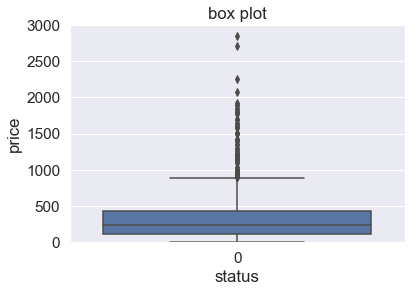

In [195]:
#https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib
# plt.close()
plt.title("box plot")
axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0,3000])
# axes.title("Box plot")
# axes.figure(figsize=(20,10))
sns.boxplot(x='status',y='price', data=df4)
# axes.show()

In [196]:
t=X_test['teacher_number_of_previously_posted_projects'].values

In [197]:
# print(te_thresholds)
teacher_fpr=[]
for i in range(0,len(t)):
    for j in fpr_list:
        if(i==j):
            teacher_fpr.append(t[i])
# print(len(worcloud_essay))
# print(teacher_fpr[1])
# print(len(teacher_fpr))

[8.38545455e-01 9.89090909e-02 2.83636364e-02 1.30909091e-02
 4.36363636e-03 5.81818182e-03 5.09090909e-03 2.90909091e-03
 7.27272727e-04 2.18181818e-03]
[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180. 200.]


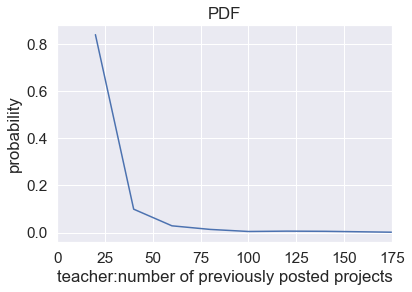

In [198]:
counts, bin_edges = np.histogram(teacher_fpr, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_xlim([0,175])
cdf = np.cumsum(pdf)
plt.xlabel("teacher:number of previously posted projects")
plt.title("PDF")
plt.ylabel("probability")
plt.plot(bin_edges[1:],pdf);

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [199]:
#Vectorizing Essays
# Please write all the code with proper documentation
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['clean_essays'].values)

print(X_train_essay_tfidf.shape)
print(X_train_essay_tfidf.shape)
print(X_train_essay_tfidf.shape)

(24520, 54787)
(24520, 54787)
(24520, 54787)


In [200]:
#Vectorizing Titles
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_selection import SelectKBest, chi2

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1, 2))
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_tfidf = vectorizer.transform(X_train['clean_titles'].values)
X_cv_titles_tfidf = vectorizer.transform(X_cv['clean_titles'].values)
X_test_titles_tfidf = vectorizer.transform(X_test['clean_titles'].values)
print("Train shape:",X_train_titles_tfidf.shape)
print("CV shape:",X_cv_titles_tfidf.shape)
print("Test shape:",X_test_titles_tfidf.shape)

Train shape: (24520, 1769)
CV shape: (12078, 1769)
Test shape: (18026, 1769)


In [201]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_a = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cr_a = hstack((X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_clean_cat_ohe,X_cv_clean_subcat_ohe, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te_a = hstack((X_test_essay_tfidf,X_test_titles_tfidf,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr_a.shape, y_train.shape)
print(X_cr_a.shape, y_cv.shape)
print(X_te_a.shape, y_test.shape)
print("="*100)

Final Data matrix
(24520, 56659) (24520,)
(12078, 56659) (12078,)
(18026, 56659) (18026,)


In [202]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#Vectorizing Essays
# Please write all the code with proper documentation
#Vectorizing Essays


In [203]:
print(y_train.shape)

(24520,)


In [204]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_tr_a, y_train)



In [205]:
print(type(clf))

<class 'sklearn.tree.tree.DecisionTreeClassifier'>


In [206]:
names = vectorizer.get_feature_names()
print(names[0:10])

['101', '16', '1st', '1st grade', '1st graders', '2016', '2017', '21st', '21st century', '2nd']


In [207]:
importances = clf.feature_importances_
# print(type(importances))
# print(importances[2])
# print(importances.shape)

indices = np.argsort(importances)[::-1][:5000]
print(len(indices))

# names = tfidf.get_feature_names()

5000


In [208]:
# print(X_tr.head)
# X_a=X_tr.tocsr().todense()
X_tr=X_tr_a[:,indices]
X_cr=X_cr_a[:,indices]
X_te=X_te_a[:,indices]
# y_train_a=y_train[:5000]
# y_cv_a=y_cv[:5000]
# y_test_a=y_test[:5000]

In [209]:
print(X_tr.shape)
# print(y_train_a.shape)

(24520, 5000)


In [210]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

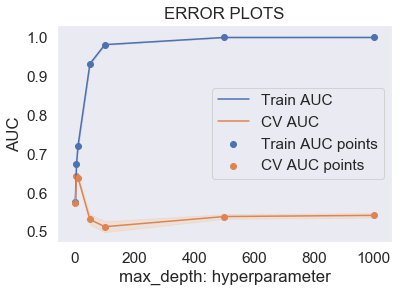

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 1min 11s


In [211]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=5,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

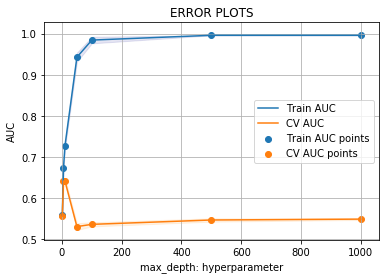

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 1min 4s


In [327]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=10,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

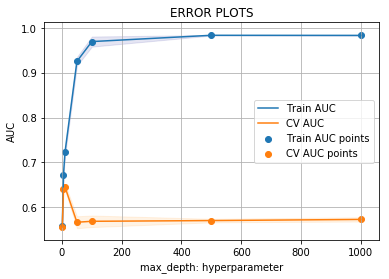

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 1min 4s


In [328]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=100,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

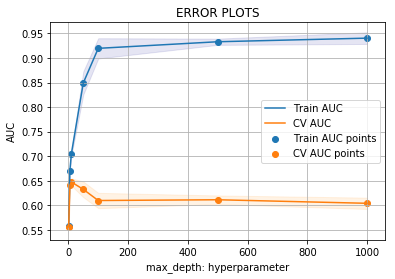

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Wall time: 54.5 s


In [329]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#min_samples_split=5
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(min_samples_split=500,class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(tuned_parameters['max_depth'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.1,color='darkblue')

plt.plot(tuned_parameters['max_depth'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(tuned_parameters['max_depth'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.1,color='darkorange')

plt.scatter(tuned_parameters['max_depth'], train_auc, label='Train AUC points')
plt.scatter(tuned_parameters['max_depth'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()
print(clf.best_estimator_)

In [330]:
from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn import tree

# Depths = [1,5,10,50,100,500,1000]


dtc=tree.DecisionTreeClassifier(class_weight="balanced")
tuned_parameters = {'max_depth': [1,5,10,50,100,500,1000],'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dtc, tuned_parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


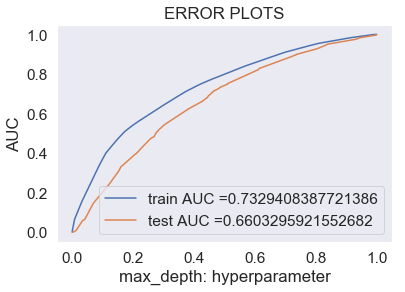

Wall time: 1.14 s


In [212]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn import tree

dtc=tree.DecisionTreeClassifier(min_samples_split=500,max_depth=10,class_weight="balanced")
#https://github.com/scikit-learn/scikit-learn/issues/7278
# calibrated_clf = CalibratedClassifierCV(sgd, method='sigmoid')
dtc.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtc, X_tr)    
y_test_pred = batch_predict(dtc, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h1>3. Conclusion</h1>

In [213]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Max Depth","Min Sample split", "AUC"]

x.add_row(["BOW", "BRUTE", 10,500, 0.73])
x.add_row(["TFIDF", "BRUTE", 5,500,0.75 ])
x.add_row(["W2V", "BRUTE", 5, 10 ,0.69])
x.add_row(["TFIDFW2V", "BRUTE", 5,500, 0.69])
x.add_row(["TFIDF with 5K Features", "BRUTE", 10,500, 0.73])


print(x)

+------------------------+-------+-----------+------------------+------+
|       Vectorizer       | Model | Max Depth | Min Sample split | AUC  |
+------------------------+-------+-----------+------------------+------+
|          BOW           | BRUTE |     10    |       500        | 0.73 |
|         TFIDF          | BRUTE |     5     |       500        | 0.75 |
|          W2V           | BRUTE |     5     |        10        | 0.69 |
|        TFIDFW2V        | BRUTE |     5     |       500        | 0.69 |
| TFIDF with 5K Features | BRUTE |     10    |       500        | 0.73 |
+------------------------+-------+-----------+------------------+------+
